# Initial Questions
1. What are the downsides of development? 

# Profile

* Where did the data set come from (provenance)? What's in it?
    * The data is sourced from multiple locations and aggregated by The World Bank. Seems to mostly come from large, inter-governmental institutions, like the United Nations. I did not investigate tertiary sources in the hierarchy
        * Environmental Center 
        * Food and Agriculture Organization
        * Internal Displacement Monitoring Centre. 
        * World Health Organization
    
* How big is data set (how many rows? how many variables? file size?).
* What types of data variables present? What are the dimensions/type?
* What is the overall perceived quality of the data? What's missing? What do you wish it included? Any noticeable outliers? Any other anomalous or curious things that jump out at you?


# Variables to consider
## Positive indicators
* GDP per capita (current US$)
* GNI per capita, Atlas method (current US$)
* Literacy rate, adult total (% of people ages 15 and above)
* Mortality rate, infant (per 1,000 live births)
* Current health expenditure (% of GDP)
* Access to electricity (% population)
* industry (including construction), value added (% of GDP)

## Potentially negative indicators
* Rural population (% of total population)
* Urban population (% of total population)
* Total greenhouse gas emitions (kt)
* Forest area (% of land)
* Agriculture, forestry, fishing, value added (% of GDP)
* level of water stress
* Livestock production index (2014-2016 = 100)
* Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)
* Cause of death, by non-communicable diseases (% of total)
* Droughts, floods, extreme temperatures (% of population, average 1990-2009)
* Death rate, crude (per 1,000 people)
* Suicide mortality rate (per 100,000 population)
* Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)
* PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)
* CO2 emissions metric tons per capita

## Dropped indicators
* Bird, fish, mammal, plant species (threatened)
    * Data is too sparse--single entry for each per country. Also the number of threatened species is not normalized by the number of species in that country, so comparisons wouldn't make much sense. 
    TODO: visualization that demonstates sparseness

I did some filtering on the world bank webite. I looked through the variables and decided what was relevant to my question. Domain knowledge would have been helpful here. I pulled data for all years (1960 to 2019) and each of the above variables. Where possible, I chose variables that had already been normalized per capita. I do not yet know the fullness of the data. 

In [360]:
import pandas as pd
import numpy as np
import requests

pd.set_option('display.max.columns', None)
pd.set_option('display.precision', 2)

df = pd.read_csv('data/species.csv', na_values='..')

# Standardize column names: replace spaces with underscores and upper-case with lower-case
df.columns = [c.lower().replace(' ', '_').replace('(', '').replace(')', ''). replace('%', 'percent') for c in df.columns]

df.head(1)
df.info()

,country_name,country_code,series_name,series_code,1960_[yr1960],1961_[yr1961],1962_[yr1962],1963_[yr1963],1964_[yr1964],1965_[yr1965],1966_[yr1966],1967_[yr1967],1968_[yr1968],1969_[yr1969],1970_[yr1970],1971_[yr1971],1972_[yr1972],1973_[yr1973],1974_[yr1974],1975_[yr1975],1976_[yr1976],1977_[yr1977],1978_[yr1978],1979_[yr1979],1980_[yr1980],1981_[yr1981],1982_[yr1982],1983_[yr1983],1984_[yr1984],1985_[yr1985],1986_[yr1986],1987_[yr1987],1988_[yr1988],1989_[yr1989],1990_[yr1990],1991_[yr1991],1992_[yr1992],1993_[yr1993],1994_[yr1994],1995_[yr1995],1996_[yr1996],1997_[yr1997],1998_[yr1998],1999_[yr1999],2000_[yr2000],2001_[yr2001],2002_[yr2002],2003_[yr2003],2004_[yr2004],2005_[yr2005],2006_[yr2006],2007_[yr2007],2008_[yr2008],2009_[yr2009],2010_[yr2010],2011_[yr2011],2012_[yr2012],2013_[yr2013],2014_[yr2014],2015_[yr2015],2016_[yr2016],2017_[yr2017],2018_[yr2018],2019_[yr2019],2020_[yr2020]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.3,28.1,33.9,42.4,45.52,42.7,43.22,69.1,68.98,89.5,71.5,97.7,97.7,98.72,97.7,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7166 entries, 0 to 7165
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_name   7163 non-null   object 
 1   country_code   7161 non-null   object 
 2   series_name    7161 non-null   object 
 3   series_code    7161 non-null   object 
 4   1960_[yr1960]  992 non-null    float64
 5   1961_[yr1961]  1508 non-null   float64
 6   1962_[yr1962]  1593 non-null   float64
 7   1963_[yr1963]  1606 non-null   float64
 8   1964_[yr1964]  1629 non-null   float64
 9   1965_[yr1965]  1656 non-null   float64
 10  1966_[yr1966]  1665 non-null   float64
 11  1967_[yr1967]  1682 non-null   float64
 12  1968_[yr1968]  1702 non-null   float64
 13  1969_[yr1969]  1942 non-null   float64
 14  1970_[yr1970]  2483 non-null   float64
 15  1971_[yr1971]  2665 non-null   float64
 16  1972_[yr1972]  2700 non-null   float64
 17  1973_[yr1973]  2686 non-null   float64
 18  1974_[yr

In [357]:
# Transform data to be of this form:
# country_name, year, series_1, series_1, series_n

# Get all the column years 
year_columns = df.columns[4:]

df_melted = df.melt(df.columns[:4], year_columns, 'year')
df_melted = df_melted.drop('series_code', 1)

df_rdy = df_melted.pivot_table(index=['country_name', 'year'], columns='series_name', values='value')

df_rdy.columns = ["".join(filter((lambda c: c == '_' or str.isalnum(c)), c.lower().replace('%', 'percent'))).replace(' ', '_') for c in df_rdy.columns]

#undo multi-index from pivot
df_rdy = df_rdy.reset_index()

# Clean up the years values 
df_rdy.year = pd.to_numeric(df_rdy.year.str[:4])

df_rdy.head(5)

df_rdy.columns


,country_name,year,accesstoelectricitypercentofpopulation,agriculturallandpercentoflandarea,agriculturalmethaneemissionspercentoftotal,agriculturalmethaneemissionsthousandmetrictonsofco2equivalent,birdspeciesthreatened,co2emissionskt,co2emissionsmetrictonspercapita,causeofdeathbycommunicablediseasesandmaternalprenatalandnutritionconditionspercentoftotal,causeofdeathbynoncommunicablediseasespercentoftotal,currenthealthexpenditurepercapitacurrentus,droughtsfloodsextremetemperaturespercentofpopulationaverage19902009,electricpowerconsumptionkwhpercapita,energyimportsnetpercentofenergyuse,fishspeciesthreatened,forestareapercentoflandarea,forestrentspercentofgdp,gnipercapitaatlasmethodcurrentus,industryincludingconstructionvalueaddedpercentofgdp,levelofwaterstressfreshwaterwithdrawalasaproportionofavailablefreshwaterresources,literacyrateadulttotalpercentofpeopleages15andabove,livestockproductionindex20142016100,mammalspeciesthreatened,mortalityfromcvdcancerdiabetesorcrdbetweenexactages30and70percent,mortalityrateinfantmaleper1000livebirths,mortalityrateneonatalper1000livebirths,pm25airpollutionpopulationexposedtolevelsexceedingwhoguidelinevaluepercentoftotal,permanentcroplandpercentoflandarea,plantspecieshigherthreatened,ruralpopulationpercentoftotalpopulation,suicidemortalityrateper100000population,terrestrialprotectedareaspercentoftotallandarea,totalgreenhousegasemissionsktofco2equivalent,urbanpopulationpercentoftotalpopulation
0,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,414.37,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.60,NaN,NaN,NaN,8.40
1,Afghanistan,1961,NaN,57.75,NaN,NaN,NaN,491.38,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.35,NaN,NaN,NaN,NaN,NaN,0.08,NaN,91.32,NaN,NaN,NaN,8.68
2,Afghanistan,1962,NaN,57.84,NaN,NaN,NaN,689.40,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.88,NaN,NaN,243.6,NaN,NaN,0.09,NaN,91.02,NaN,NaN,NaN,8.98
3,Afghanistan,1963,NaN,57.91,NaN,NaN,NaN,707.73,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.52,NaN,NaN,239.3,NaN,NaN,0.09,NaN,90.72,NaN,NaN,NaN,9.28
4,Afghanistan,1964,NaN,58.01,NaN,NaN,NaN,839.74,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.96,NaN,NaN,235.1,NaN,NaN,0.11,NaN,90.41,NaN,NaN,NaN,9.59


Index(['country_name', 'year', 'accesstoelectricitypercentofpopulation',
       'agriculturallandpercentoflandarea',
       'agriculturalmethaneemissionspercentoftotal',
       'agriculturalmethaneemissionsthousandmetrictonsofco2equivalent',
       'birdspeciesthreatened', 'co2emissionskt',
       'co2emissionsmetrictonspercapita',
       'causeofdeathbycommunicablediseasesandmaternalprenatalandnutritionconditionspercentoftotal',
       'causeofdeathbynoncommunicablediseasespercentoftotal',
       'currenthealthexpenditurepercapitacurrentus',
       'droughtsfloodsextremetemperaturespercentofpopulationaverage19902009',
       'electricpowerconsumptionkwhpercapita',
       'energyimportsnetpercentofenergyuse', 'fishspeciesthreatened',
       'forestareapercentoflandarea', 'forestrentspercentofgdp',
       'gnipercapitaatlasmethodcurrentus',
       'industryincludingconstructionvalueaddedpercentofgdp',
       'levelofwaterstressfreshwaterwithdrawalasaproportionofavailablefreshwaterresour

In [358]:
df_rdy = df_rdy.rename(
    columns=
    {'accesstoelectricitypercentofpopulation': 'electric_perc_pop',
       'agriculturallandpercentoflandarea': 'ag_perc_land_area',
       'agriculturalmethaneemissionspercentoftotal': 'ag_methane_perc_total,',
       'agriculturalmethaneemissionsthousandmetrictonsofco2equivalent': 'ag_methane_co2_eq',
       'birdspeciesthreatened': 'birds_threatened',
       'co2emissionskt': 'co2_kt',
       'co2emissionsmetrictonspercapita': 'co2_mt_per_cap',
       'causeofdeathbycommunicablediseasesandmaternalprenatalandnutritionconditionspercentoftotal': 'dth_commun_disease_perc_tot',
       'causeofdeathbynoncommunicablediseasespercentoftotal': 'dth_noncommun_disease_perc_tot',
       'currenthealthexpenditurepercapitacurrentus': 'health_exp_per_cap_usd',
       'droughtsfloodsextremetemperaturespercentofpopulationaverage19902009': 'xtreme_weather_pop_avg',
       'electricpowerconsumptionkwhpercapita': 'electric_use_per_cap',
       'energyimportsnetpercentofenergyuse': 'energy_import_perc_use', 
       'fishspeciesthreatened': 'fish_threatened',
       'forestareapercentoflandarea': 'forest_perc_land', 
       'forestrentspercentofgdp': 'forest_rent_perc_gdp',
       'gnipercapitaatlasmethodcurrentus': "gni_per_cap_usd",
       'industryincludingconstructionvalueaddedpercentofgdp': 'industry_construction_perc_gdp',
       'levelofwaterstressfreshwaterwithdrawalasaproportionofavailablefreshwaterresources': 'water_stress',
       'literacyrateadulttotalpercentofpeopleages15andabove': 'literacy_perc_total',
       'livestockproductionindex20142016100': 'livestock_production_idx', 
       'mammalspeciesthreatened': 'mammals_threatened',
       'mortalityfromcvdcancerdiabetesorcrdbetweenexactages30and70percent': 'mortality_cancer',
       'mortalityrateinfantmaleper1000livebirths': 'mortality_infant',
       'mortalityrateneonatalper1000livebirths': 'mortality_neonatal',
       'pm25airpollutionpopulationexposedtolevelsexceedingwhoguidelinevaluepercentoftotal': 'pm25_exceppt_who_perc_total',
       'permanentcroplandpercentoflandarea': 'perm_crop_land_perc_land_area', 
       'plantspecieshigherthreatened': 'plant_threatened',
       'ruralpopulationpercentoftotalpopulation': 'rural_pop_perc_total',
       'suicidemortalityrateper100000population': 'suicide_rate',
       'terrestrialprotectedareaspercentoftotallandarea': 'protetected_land_perc_land_area',
       'totalgreenhousegasemissionsktofco2equivalent': 'total_ghg',
       'agricultureforestryandfishingvalueaddedpercentofgdp': 'ag_forestry_perc_of_gdp',
       'currenthealthexpenditurepercentofgdp': 'health_expend_perc_of_gdp',
       'deathratecrudeper1000people': 'dth_per_1000',
       'industryincludingconstructionvalueaddedannualpercentgrowth': 'indust_construction_perc_growth',
       'mortalityrateinfantper1000livebirths': 'mort_infant_per_1000',
       'gdppercapitacurrentus': 'gdp_per_capita_usd',
       'urbanpopulationpercentoftotalpopulation': 'urbal_pop_perc_total'
    }
)

df_rdy.head(5)

,country_name,year,electric_perc_pop,ag_perc_land_area,"ag_methane_perc_total,",ag_methane_co2_eq,birds_threatened,co2_kt,co2_mt_per_cap,dth_commun_disease_perc_tot,dth_noncommun_disease_perc_tot,health_exp_per_cap_usd,xtreme_weather_pop_avg,electric_use_per_cap,energy_import_perc_use,fish_threatened,forest_perc_land,forest_rent_perc_gdp,gni_per_cap_usd,industry_construction_perc_gdp,water_stress,literacy_perc_total,livestock_production_idx,mammals_threatened,mortality_cancer,mortality_infant,mortality_neonatal,pm25_exceppt_who_perc_total,perm_crop_land_perc_land_area,plant_threatened,rural_pop_perc_total,suicide_rate,protetected_land_perc_land_area,total_ghg,urbal_pop_perc_total
0,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,414.37,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.60,NaN,NaN,NaN,8.40
1,Afghanistan,1961,NaN,57.75,NaN,NaN,NaN,491.38,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.35,NaN,NaN,NaN,NaN,NaN,0.08,NaN,91.32,NaN,NaN,NaN,8.68
2,Afghanistan,1962,NaN,57.84,NaN,NaN,NaN,689.40,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.88,NaN,NaN,243.6,NaN,NaN,0.09,NaN,91.02,NaN,NaN,NaN,8.98
3,Afghanistan,1963,NaN,57.91,NaN,NaN,NaN,707.73,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.52,NaN,NaN,239.3,NaN,NaN,0.09,NaN,90.72,NaN,NaN,NaN,9.28
4,Afghanistan,1964,NaN,58.01,NaN,NaN,NaN,839.74,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.96,NaN,NaN,235.1,NaN,NaN,0.11,NaN,90.41,NaN,NaN,NaN,9.59


In [359]:
s_sum_missing = ((df_rdy.isna().sum() / df_rdy.shape[0])*100).sort_values()
print(s_sum_missing)


country_name                        0.00
year                                0.00
rural_pop_perc_total                0.85
urbal_pop_perc_total                0.85
ag_perc_land_area                  15.69
livestock_production_idx           19.02
co2_kt                             20.24
co2_mt_per_cap                     20.27
mortality_infant                   20.91
perm_crop_land_perc_land_area      21.59
ag_methane_co2_eq                  23.65
total_ghg                          29.09
mortality_neonatal                 32.14
forest_rent_perc_gdp               33.46
gni_per_cap_usd                    34.65
industry_construction_perc_gdp     39.95
ag_methane_perc_total,             42.02
forest_perc_land                   50.57
energy_import_perc_use             55.17
electric_use_per_cap               55.37
electric_perc_pop                  57.64
suicide_rate                       72.31
mortality_cancer                   72.31
health_exp_per_cap_usd             73.21
pm25_exceppt_who

<AxesSubplot:>

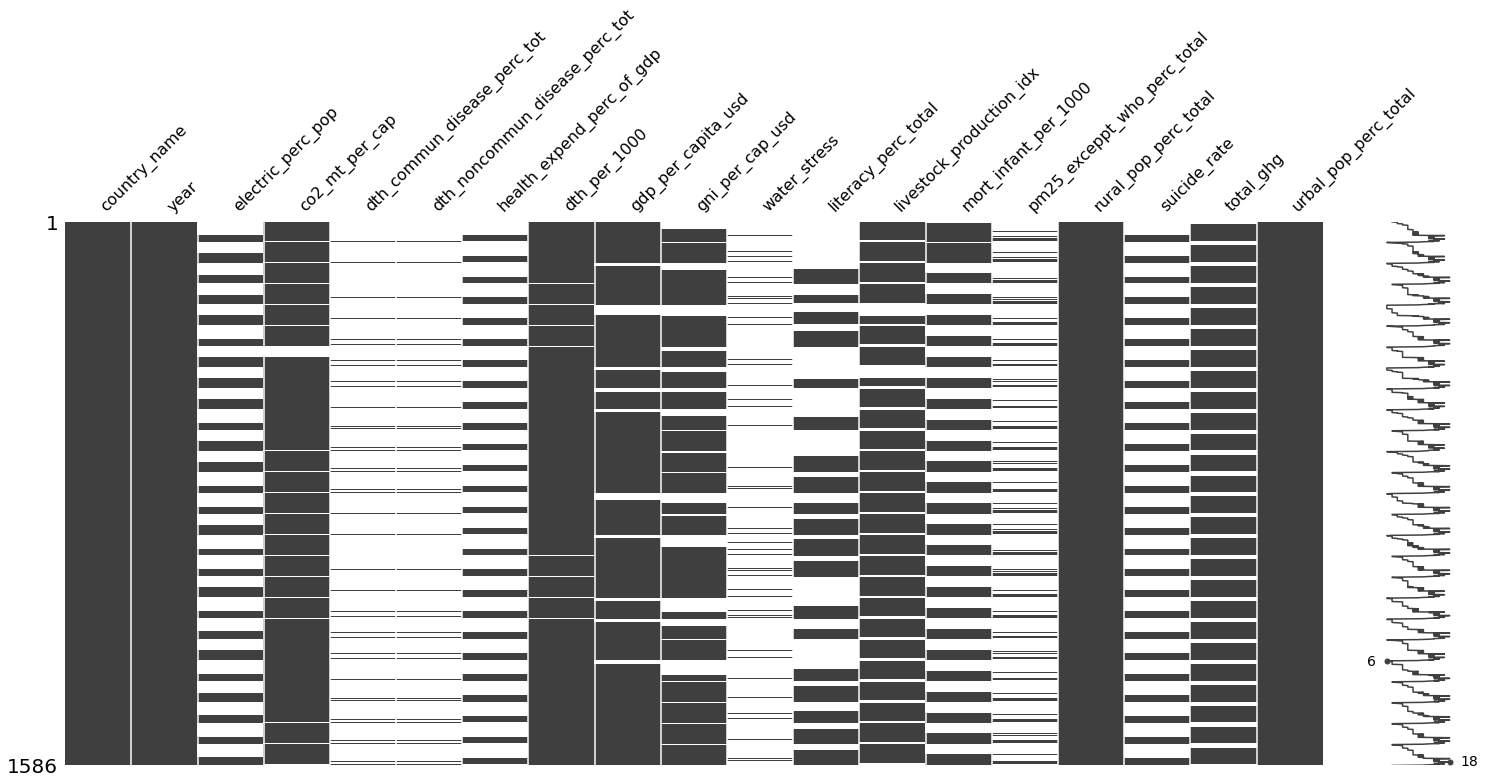

In [344]:
import missingno as msno

# Categories with most complete data
msno.matrix(df_rdy)

<AxesSubplot:>

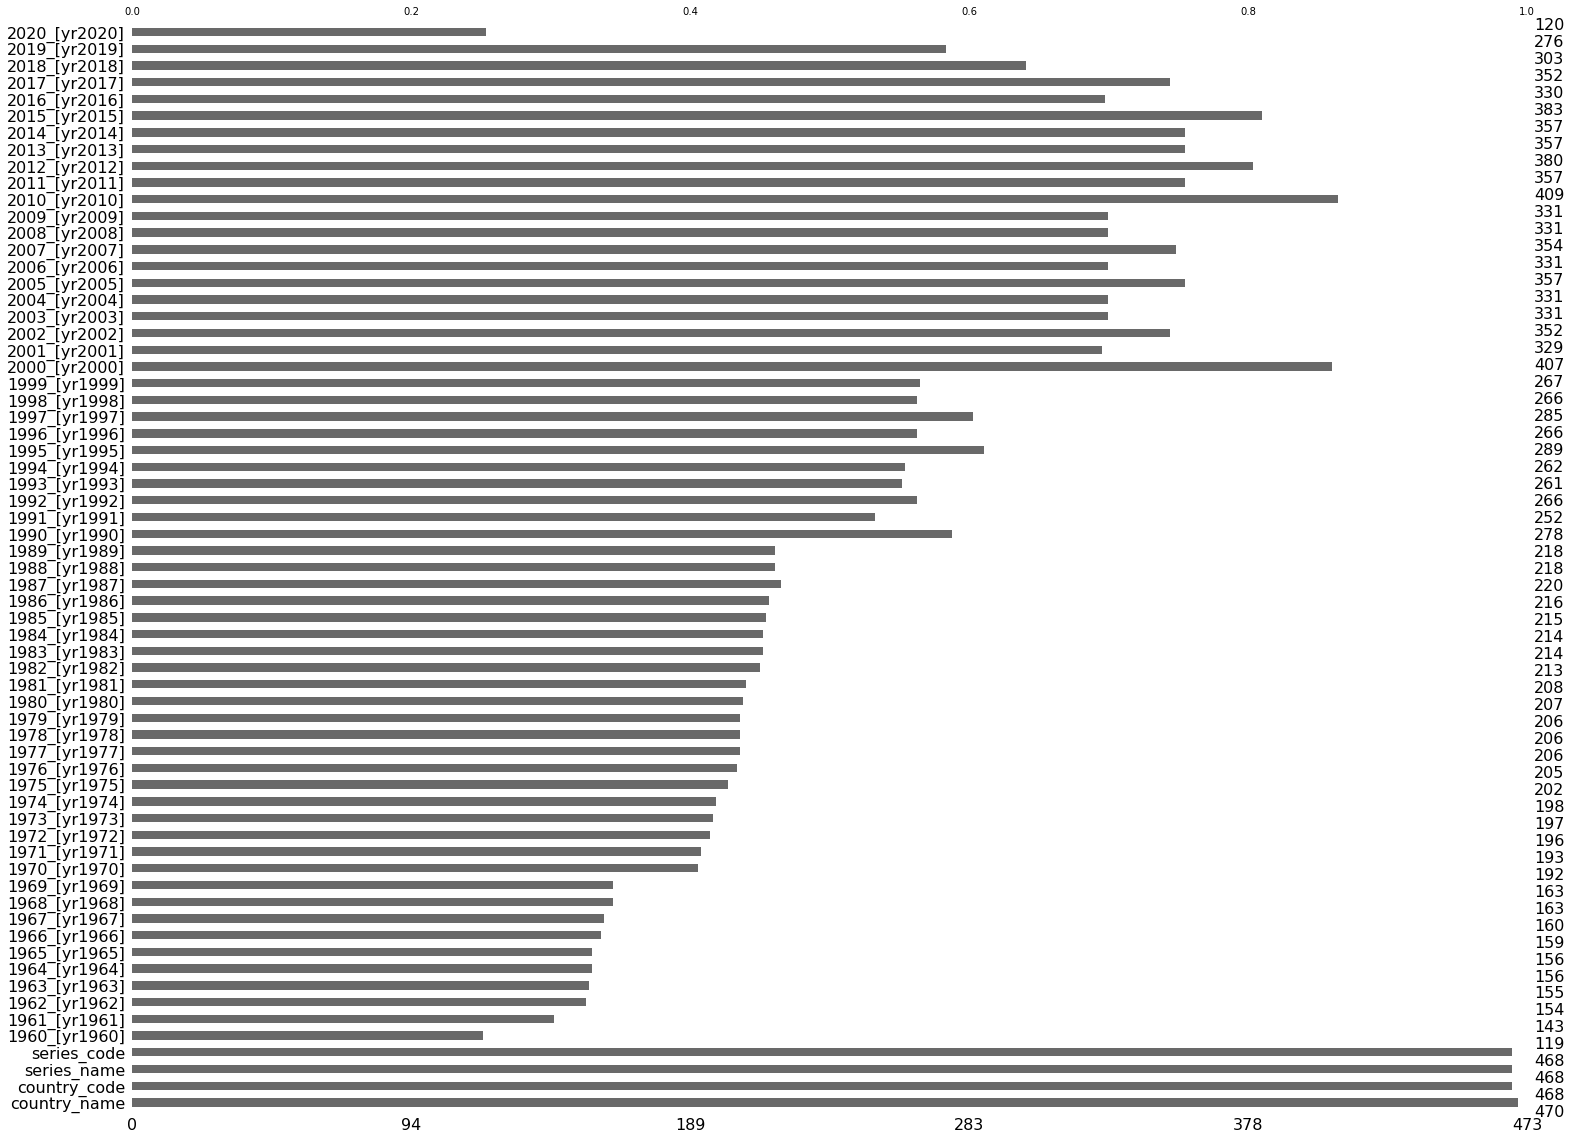

In [345]:
# Years with most complete data

msno.bar(df)


<AxesSubplot:>

<AxesSubplot:>

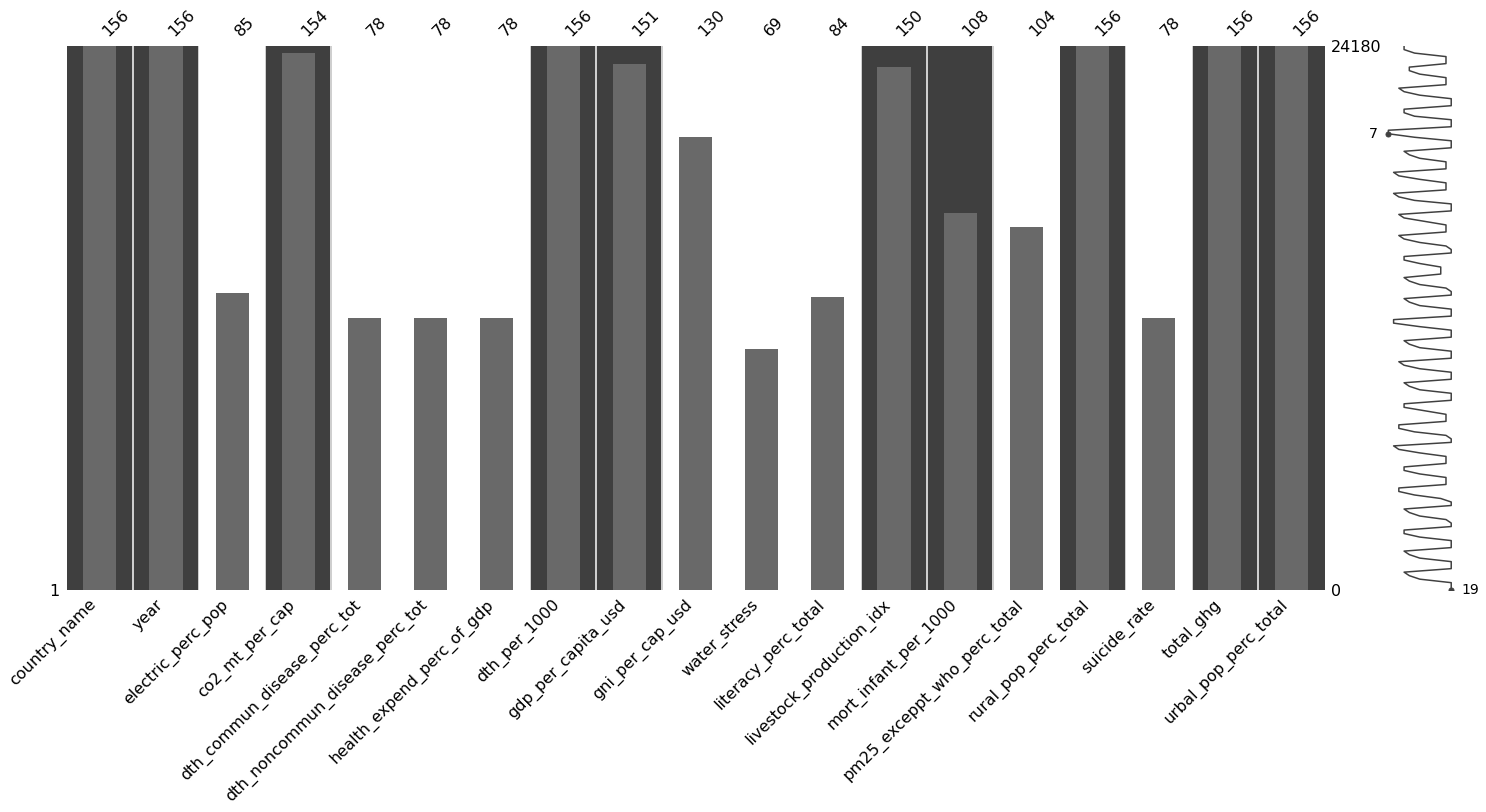

In [346]:
df_agg = df_rdy.groupby(['country_name', pd.cut(df_rdy.year, np.arange(1960, 2021, 10))]).mean().drop('year', 1).reset_index()
df_agg5 = df_rdy.groupby(['country_name', pd.cut(df_rdy.year, np.arange(1960, 2021, 5))]).mean().drop('year', 1).reset_index()

msno.matrix(df_agg)

# TODO: which years have the most complete data?
msno.bar(df_agg)


,country_name,year,electric_perc_pop,co2_mt_per_cap,dth_commun_disease_perc_tot,dth_noncommun_disease_perc_tot,health_expend_perc_of_gdp,dth_per_1000,gdp_per_capita_usd,gni_per_cap_usd,water_stress,literacy_perc_total,livestock_production_idx,mort_infant_per_1000,pm25_exceppt_who_perc_total,rural_pop_perc_total,suicide_rate,total_ghg,urbal_pop_perc_total
0,Africa Eastern and Southern,"(1960, 1970]",NaN,1.02,NaN,NaN,NaN,20.16,188.28,NaN,NaN,NaN,4.67,132.68,NaN,83.82,NaN,2.51e+06,16.18
1,Africa Eastern and Southern,"(1970, 1980]",NaN,1.20,NaN,NaN,NaN,17.44,431.98,NaN,NaN,NaN,6.39,126.02,NaN,80.66,NaN,1.93e+06,19.34
2,Africa Eastern and Southern,"(1980, 1990]",NaN,1.35,NaN,NaN,NaN,15.65,624.51,573.44,NaN,NaN,8.73,113.19,100.0,77.12,NaN,1.68e+06,22.88
3,Africa Eastern and Southern,"(1990, 2000]",20.09,0.94,67.04,24.62,5.83,14.95,683.95,665.98,255.33,NaN,13.17,94.33,100.0,72.78,10.88,9.00e+05,27.22
4,Africa Eastern and Southern,"(2000, 2010]",26.27,1.03,59.15,31.90,6.08,12.16,1057.45,966.85,330.58,NaN,20.84,69.42,100.0,69.50,9.96,1.17e+06,30.50


<AxesSubplot:>

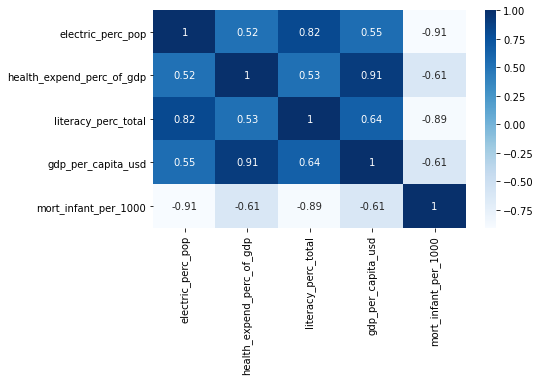

In [347]:
# Is there a correlation between "positive" indicators?
positive_indicators = ['electric_perc_pop', 'health_expend_perc_of_gdp', 'literacy_perc_total', 'gdp_per_capita_usd', 'mort_infant_per_1000']
df_agg.head()

import seaborn as sb
corr = df_agg[positive_indicators].corr()
sb.heatmap(corr, cmap='Blues', annot=True)


,country_name,year,electric_perc_pop,co2_mt_per_cap,dth_commun_disease_perc_tot,dth_noncommun_disease_perc_tot,health_expend_perc_of_gdp,dth_per_1000,gdp_per_capita_usd,gni_per_cap_usd,water_stress,literacy_perc_total,livestock_production_idx,mort_infant_per_1000,pm25_exceppt_who_perc_total,rural_pop_perc_total,suicide_rate,total_ghg,urbal_pop_perc_total
0,Africa Eastern and Southern,"(1960, 1970]",NaN,1.02,NaN,NaN,NaN,20.16,188.28,NaN,NaN,NaN,4.67,132.68,NaN,83.82,NaN,2.51e+06,16.18
1,Africa Eastern and Southern,"(1970, 1980]",NaN,1.20,NaN,NaN,NaN,17.44,431.98,NaN,NaN,NaN,6.39,126.02,NaN,80.66,NaN,1.93e+06,19.34
2,Africa Eastern and Southern,"(1980, 1990]",NaN,1.35,NaN,NaN,NaN,15.65,624.51,573.44,NaN,NaN,8.73,113.19,100.0,77.12,NaN,1.68e+06,22.88
3,Africa Eastern and Southern,"(1990, 2000]",20.09,0.94,67.04,24.62,5.83,14.95,683.95,665.98,255.33,NaN,13.17,94.33,100.0,72.78,10.88,9.00e+05,27.22
4,Africa Eastern and Southern,"(2000, 2010]",26.27,1.03,59.15,31.90,6.08,12.16,1057.45,966.85,330.58,NaN,20.84,69.42,100.0,69.50,9.96,1.17e+06,30.50


<AxesSubplot:>

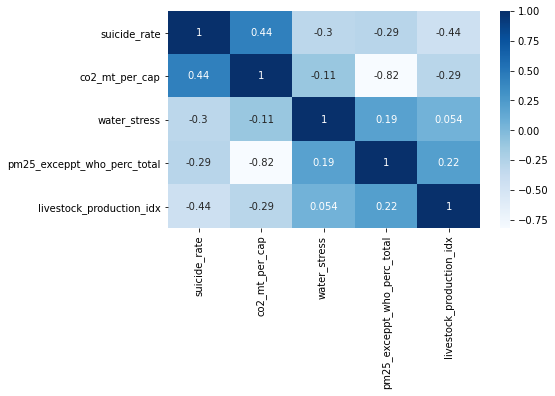

In [348]:
# Is there a correlation between "negative" indicators?
positive_indicators = ['suicide_rate', 'co2_mt_per_cap', 'water_stress', 'pm25_exceppt_who_perc_total', 'livestock_production_idx']
df_agg.head()

import seaborn as sb
corr = df_agg[positive_indicators].corr()
sb.heatmap(corr, cmap='Blues', annot=True)

<AxesSubplot:>

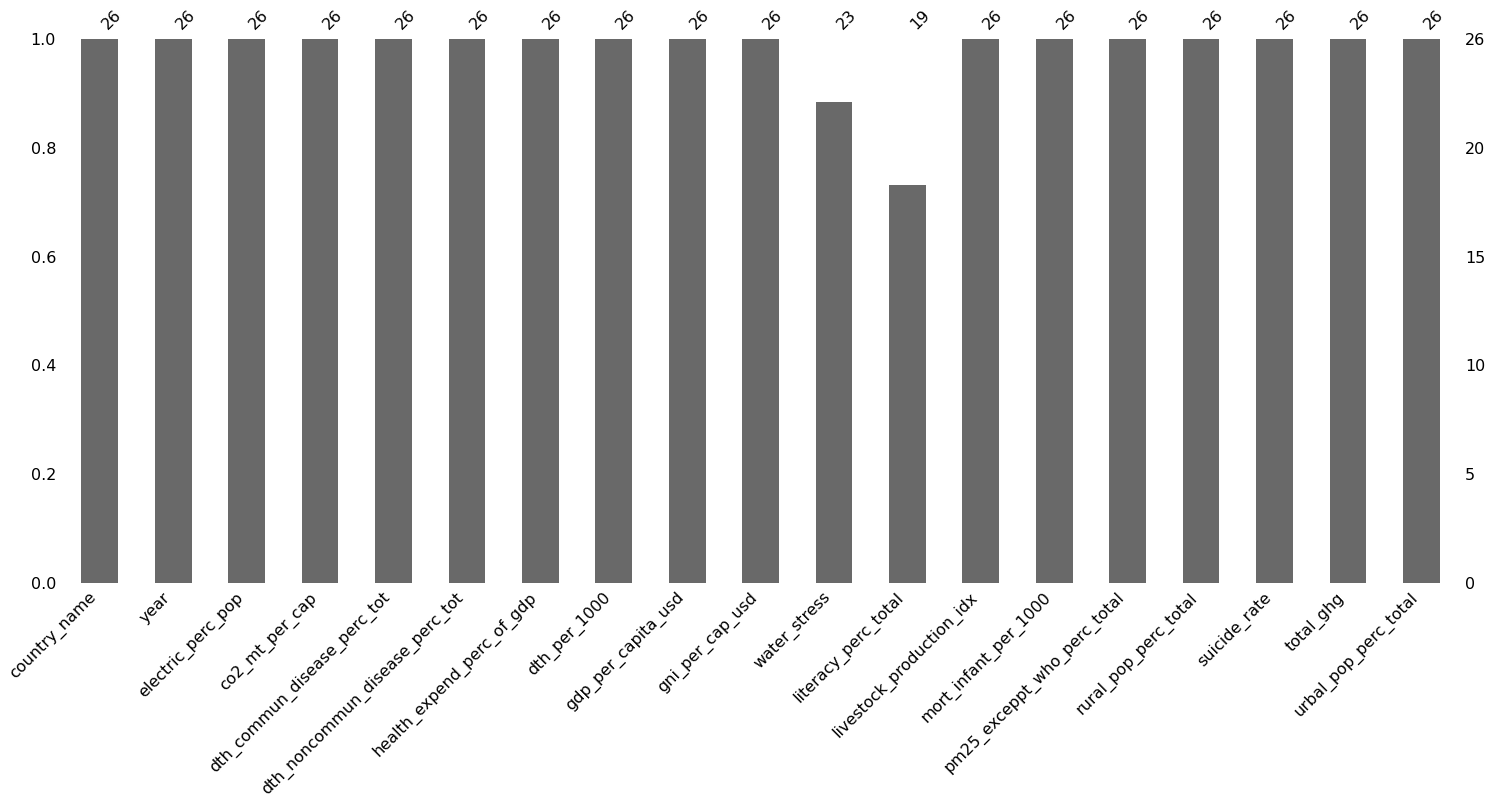

In [349]:
# TODO: copy this to template in quiver
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 500)

# Is there a relationship between missing values and "positive indicators"?
df_agg.year = df_agg.year.astype('string')
df_agg5.year = df_agg5.year.astype('string')
df_2010 = df_agg[df_agg.year == '(2010, 2020]']

msno.bar(df_2010)


In [350]:
df_2010.suicide_rate

5       8.49
11      5.86
17      4.36
23      9.58
29     15.26
35      8.39
41     11.98
47     14.80
53     12.56
59      5.52
65     14.00
71      6.05
77      8.90
83      6.29
89      8.92
95      4.66
101     9.17
107    14.38
113    15.42
119    13.95
125    14.89
131    14.24
137    11.49
143     7.43
149     9.50
155     9.68
Name: suicide_rate, dtype: float64

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 0.5, 'GDP per capita (USD current)')

Text(0, 0.5, 'Suicide rate pre 100,000 people')

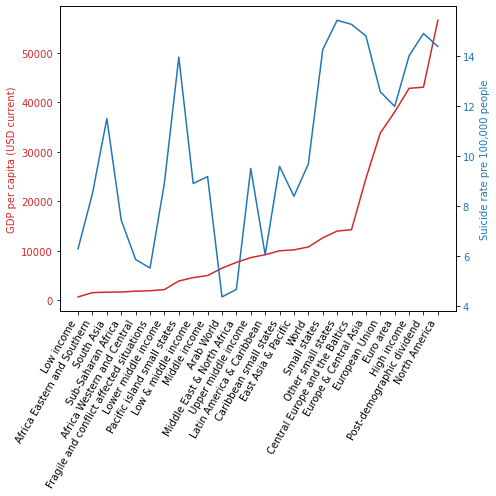

In [351]:
plt.rcParams["figure.figsize"] = (7,7)

# Sort df by posotive indicator
df_2010 = df_2010.sort_values('gdp_per_capita_usd')

# Show snapshot
fig, ax1 = plt.subplots()
plt.xticks(rotation=60, ha='right')

color = 'tab:red'
ax1.set_ylabel('GDP per capita (USD current)', color=color)
ax1.plot(df_2010.country_name, df_2010.gdp_per_capita_usd, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Suicide rate pre 100,000 people', color=color)  # we already handled the x-label with ax1
ax2.plot(df_2010.country_name, df_2010.suicide_rate, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 0.5, 'GDP per capita (USD current)')

Text(0, 0.5, 'PM2.5 exposure above WHO guideline (% population)')

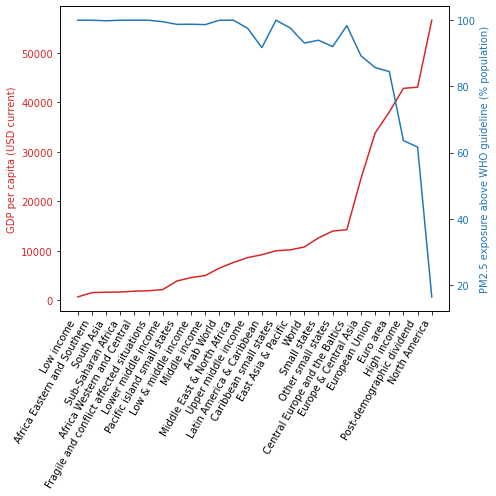

In [300]:
# Sort df by posotive indicator
df_2010 = df_2010.sort_values('gdp_per_capita_usd')

# Show snapshot
fig, ax1 = plt.subplots()
plt.xticks(rotation=60, ha='right')

color = 'tab:red'
ax1.set_ylabel('GDP per capita (USD current)', color=color)
ax1.plot(df_2010.country_name, df_2010.gdp_per_capita_usd, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('PM2.5 exposure above WHO guideline (% population)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_2010.country_name, df_2010.pm25_exceppt_who_perc_total, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 0.5, 'GDP per capita (USD current)')

Text(0, 0.5, 'CO2 emissions per capita (metric tons)')

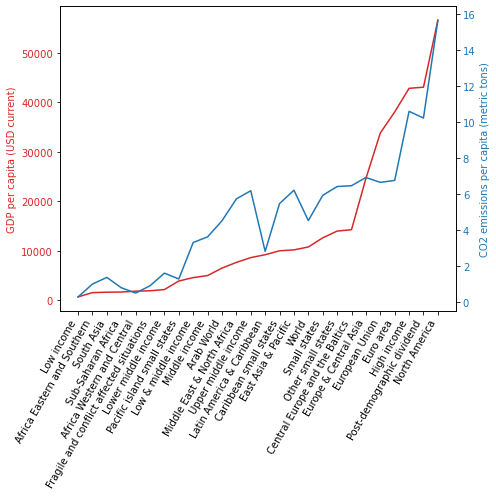

In [301]:
# Sort df by posotive indicator
df_2010 = df_2010.sort_values('gdp_per_capita_usd')

# Show snapshot
fig, ax1 = plt.subplots()
plt.xticks(rotation=60, ha='right')

color = 'tab:red'
ax1.set_ylabel('GDP per capita (USD current)', color=color)
ax1.plot(df_2010.country_name, df_2010.gdp_per_capita_usd, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CO2 emissions per capita (metric tons annually)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_2010.country_name, df_2010.co2_mt_per_cap, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 0.5, 'GDP per capita (USD current)')

Text(0, 0.5, 'CO2 emissions per capita (metric tons annually)')

<Figure size 504x288 with 0 Axes>

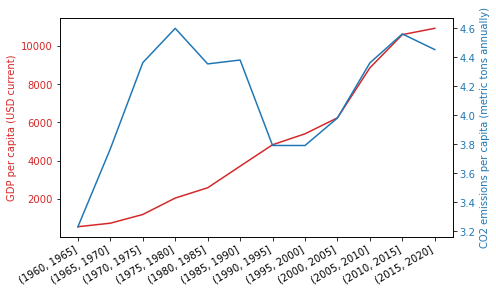

In [308]:
plt.clf()
plt.rcParams["figure.figsize"] = (7,4)


# Show world indicators over time
df_world = df_agg5[df_agg5['country_name'] == 'World']

df_world.year = df_world.year.astype('category')
# df_2010 = df_2010.sort_values('year')

# Show snapshot
fig, ax1 = plt.subplots()
plt.xticks(rotation=30, ha='right')

color = 'tab:red'
ax1.set_ylabel('GDP per capita (USD current)', color=color)
ax1.plot(df_world.year, df_world.gdp_per_capita_usd, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CO2 emissions per capita (metric tons annually)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_world.year, df_world.co2_mt_per_cap, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 0.5, 'GDP per capita (USD current)')

Text(0, 0.5, 'Suicide rate per 100,000 people')

<Figure size 504x288 with 0 Axes>

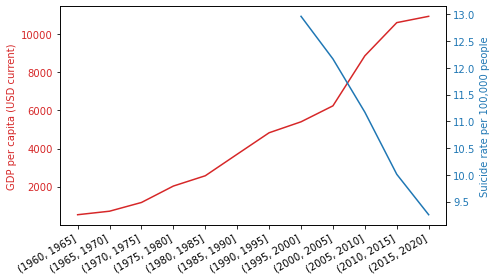

In [309]:
plt.clf()

# TODO: Clean and use

# Show world indicators over time
df_world = df_agg5[df_agg5['country_name'] == 'World']

df_world.year = df_world.year.astype('category')
# df_2010 = df_2010.sort_values('year')

# Show snapshot
fig, ax1 = plt.subplots()
plt.xticks(rotation=30, ha='right')

color = 'tab:red'
ax1.set_ylabel('GDP per capita (USD current)', color=color)
ax1.plot(df_world.year, df_world.gdp_per_capita_usd, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Suicide rate per 100,000 people', color=color)  # we already handled the x-label with ax1
ax2.plot(df_world.year, df_world.suicide_rate, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 0.5, 'GDP per capita (USD current)')

Text(0, 0.5, 'Water stress (proportion of withdrawals to availability')

<Figure size 504x288 with 0 Axes>

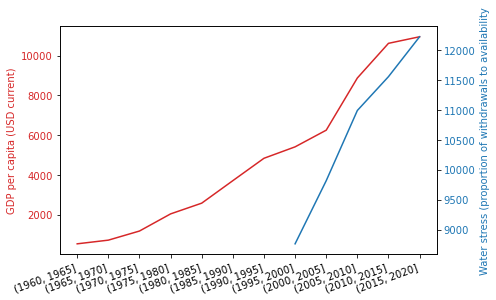

In [311]:
plt.clf()

# TODO: Clean and use

# Show world indicators over time
df_world = df_agg5[df_agg5['country_name'] == 'World']

df_world.year = df_world.year.astype('category')
# df_2010 = df_2010.sort_values('year')

# Show snapshot
fig, ax1 = plt.subplots()
plt.xticks(rotation=20, ha='right')

color = 'tab:red'
ax1.set_ylabel('GDP per capita (USD current)', color=color)
ax1.plot(df_world.year, df_world.gdp_per_capita_usd, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Water stress (proportion of withdrawals to availability', color=color)  # we already handled the x-label with ax1
ax2.plot(df_world.year, df_world.water_stress, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 0.5, 'GDP per capita (USD current)')

Text(0, 0.5, 'PM2.5 exposure above WHO guideline (% population)')

<Figure size 504x288 with 0 Axes>

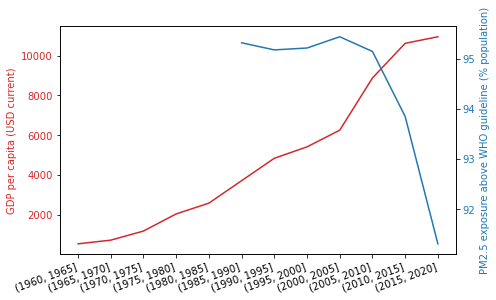

In [312]:
plt.clf()

# TODO: Clean and use

# Show world indicators over time
df_world = df_agg5[df_agg5['country_name'] == 'World']

df_world.year = df_world.year.astype('category')
# df_2010 = df_2010.sort_values('year')

# Show snapshot
fig, ax1 = plt.subplots()
plt.xticks(rotation=20, ha='right')

color = 'tab:red'
ax1.set_ylabel('GDP per capita (USD current)', color=color)
ax1.plot(df_world.year, df_world.gdp_per_capita_usd, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('PM2.5 exposure above WHO guideline (% population)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_world.year, df_world.pm25_exceppt_who_perc_total, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 0.5, 'GDP per capita (USD current)')

Text(0, 0.5, 'Forests as a % of land')

<Figure size 504x288 with 0 Axes>

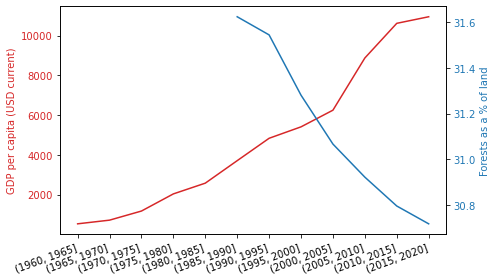

In [339]:
plt.clf()
plt.rcParams["figure.figsize"] = (7,4)

# TODO: Clean and use

# Show world indicators over time
df_world = df_agg5[df_agg5['country_name'] == 'World']

df_world.year = df_world.year.astype('category')
# df_2010 = df_2010.sort_values('year')

# Show snapshot
fig, ax1 = plt.subplots()
plt.xticks(rotation=20, ha='right')

color = 'tab:red'
ax1.set_ylabel('GDP per capita (USD current)', color=color)
ax1.plot(df_world.year, df_world.gdp_per_capita_usd, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Forests as a % of land', color=color)  # we already handled the x-label with ax1
ax2.plot(df_world.year, df_world.forest_perc_land, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()